### Load lib

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit

from data import *

plot_size = (12, 8)

### Helper Functions

In [2]:
def fix_date(df):
    df['time'] = df['time'].apply(lambda x:datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def plot(plt, xlabel, ylabel="Count of Entries"):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

###  Read the data file

In [3]:
data = []

for i in range(0, 2):
    data.append(pd.read_csv(datasets_full[i] + ".csv"))

Check if `transfer_history.cached_data_size` + `transfer_history.actually_transferred_size` = `transfer_history.transfer_size`

[4189, 2, 5564]


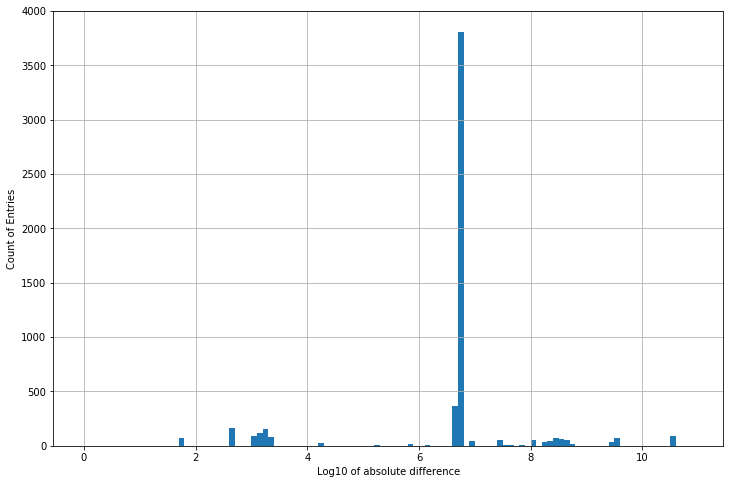

[5387, 13, 6806]


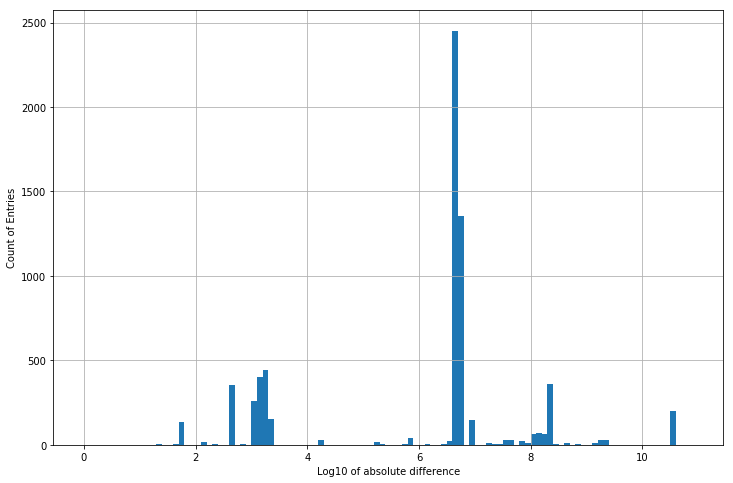

In [4]:
def check_transfer_data(temp):
    count_true = 0
    count_less = 0
    count_more = 0
    
    diff_per_list = []
    
    for index, row in temp.iterrows():
        a = row['transfer_history.cached_data_size']
        b = row['transfer_history.actually_transferred_size']
        c = row['transfer_history.transfer_size']
        
        if(a + b == c):
            count_true = count_true + 1
        else:   
            diff_per = abs(c - a - b)
            diff_per_list.append(diff_per)
            
            if(a + b < c):
                count_less = count_less + 1
            else:
                count_more = count_more + 1
    
    return [count_true, count_less, count_more], diff_per_list

for temp in data:
    stat, diff = check_transfer_data(temp)
    print(stat)
    
    plt.figure(figsize=plot_size)
    plt.hist(np.log10(diff), bins=np.arange(0, 11, 0.1))
    plot(plt, "Log10 of absolute difference")

In [5]:
data_mts = []

for i in range(0, 2):
    data_mts.append(np.array(data[i]["transfer_history.transfer_size"]))
    print("data[" + str(i) + "]")
    
    print("After removing negative and zeros : " + str(len(data_mts[i])))
    
    data_mts[i] = data_mts[i][data_mts[i] > 0.0]
    print("After removing negative and zeros : " + str(len(data_mts[i])))

data[0]
After removing negative and zeros : 9755
After removing negative and zeros : 7725
data[1]
After removing negative and zeros : 12206
After removing negative and zeros : 9504


In [6]:
data_mtts = []

for i in range(0, 2):
    data_mtts.append(np.array(data[i]["transfer_history.time_transfer_sec"]))
    print("data[" + str(i) + "]")
    
    print("After removing negative and zeros : " + str(len(data_mtts[i])))
    
    data_mtts[i] = data_mtts[i][data_mtts[i] > 0.0]
    print("After removing negative and zeros : " + str(len(data_mtts[i])))

data[0]
After removing negative and zeros : 9755
After removing negative and zeros : 9693
data[1]
After removing negative and zeros : 12206
After removing negative and zeros : 12099


### Plotting Function

In [7]:
def plot_hist(cut, temp, bins, name):
    
    # Plot the base histogram
    plt.figure(figsize=plot_size)
    plt.hist(temp, bins=np.arange(bins[0][0], bins[0][1], bins[0][2]))
    
    # Add the cutline
    plt.axvline((10.0 ** cut), color='k', linestyle='dashed')
    
    # Plot
    plot(plt, name)
    
    # Print stats related to the dotted line
    print("Points above the dotted line : " + str(sum(temp > (10.0 ** cut))))
    print("Total points in the dataset : " + str(len(temp)))

    # Get the log of the data
    temp = np.log10(temp)
    
    plt.figure(figsize=plot_size)
    
    # Now plot the logarithmic historgrams
    plt.hist(temp, bins=np.arange(bins[1][0], bins[1][1], bins[1][2]))
    
    # Calculate the bins for best fit
    # bin_heights, bin_borders = np.histogram(temp, bins='auto')
    # bin_widths = np.diff(bin_borders)
    # bin_centers = bin_borders[:-1] + bin_widths / 2
    
    # popt has the [mean, amplitude, deviation]
    # popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[mmax(bin_heights), np.std(bin_heights)])
    
    # x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)

    # Add the guassian fit
    # plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', c='red')
    
    # Add the cutline
    plt.axvline(cut, color='k', linestyle='dashed')
    
    # Add the 99.9 percentile (3 sigma) deviation
    # plt.axvline(popt[0] + popt[2]*3, color='c', linestyle='dashed')
    # plt.axvline(popt[0] - popt[2]*3, color='c', linestyle='dashed')
    
    # Plot
    plot(plt, "Log of " + name)

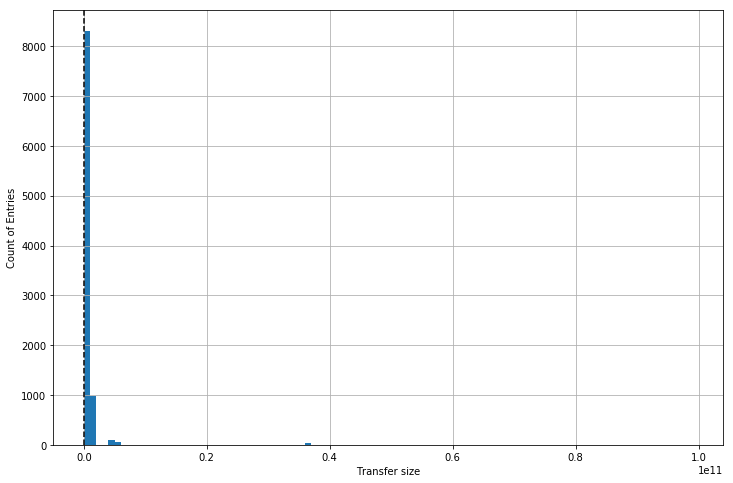

Points above the dotted line : 1657
Total points in the dataset : 9504


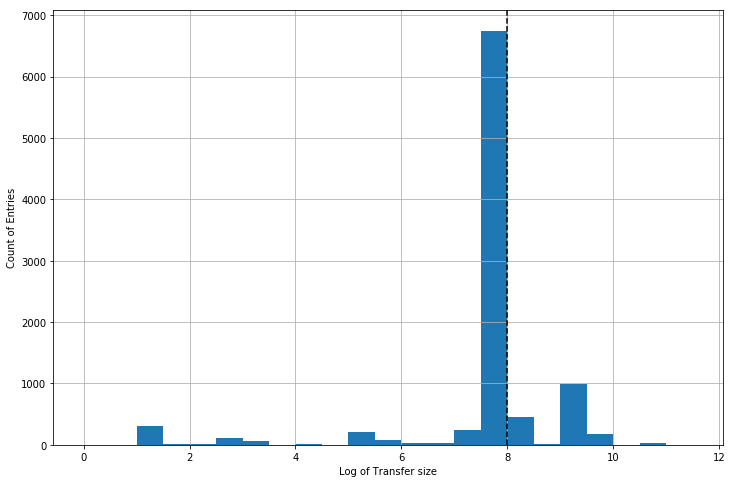

In [8]:
plot_hist(8, data_mts[1], [[0, 10**11, 10**9], [0, 12, 0.5]], "Transfer size")

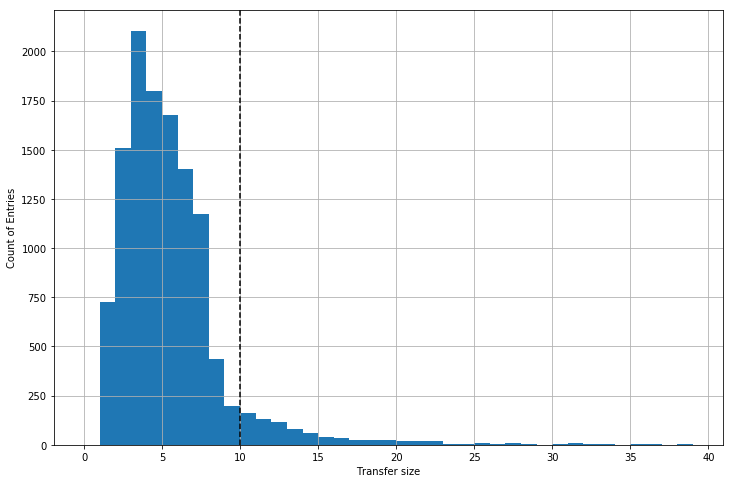

Points above the dotted line : 909
Total points in the dataset : 12099


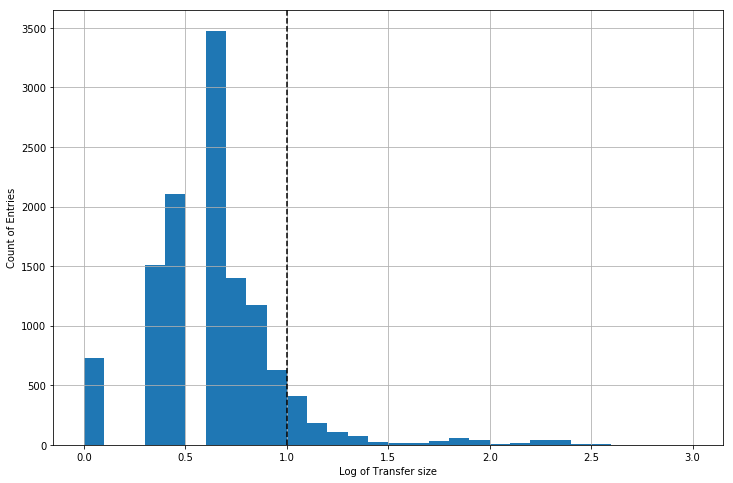

804


In [9]:
plot_hist(1, data_mtts[1], [[0, 4*(10**1), (10**0)], [0, 3.1, 0.1]], "Transfer size")
print(np.amax(data_mtts[1]))